# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [2]:
df = pd.read_excel('car data.xlsx')
df.head(2)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75


In [3]:
df.shape

(100000, 9)

The data contains 100,000 rows and 9 columns 

## Assess its content

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

There are no missing values across the features

In [6]:
df.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2014.059300,10454.815579,35544.731010,0.036080,9752.087633
std,2.592811,1497.176036,35908.164469,0.213913,1498.468367
min,2003.000000,3405.280000,606.000000,0.000000,2703.350000
25%,2013.000000,9406.007500,15760.000000,0.000000,8703.250000
50%,2015.000000,10628.705000,30595.500000,0.000000,9926.700000
75%,2016.000000,11639.782500,46476.000000,0.000000,10938.120000
max,2018.000000,12731.230000,502479.000000,3.000000,12028.000000


In [7]:
df.duplicated().sum()

6935

In [8]:
duplicates = df.duplicated().sum()
total = len(df)
percentage_duplicates = duplicates / total * 100
print("Percentage of duplicates: {:.2f}%".format(percentage_duplicates))

Percentage of duplicates: 6.93%


There are 6935 duplicates values, resulting to approximately 7%

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Car_Name       100000 non-null  object 
 1   Year           100000 non-null  int64  
 2   Present_Price  100000 non-null  float64
 3   Kms_Driven     100000 non-null  int64  
 4   Fuel_Type      100000 non-null  object 
 5   Seller_Type    100000 non-null  object 
 6   Transmission   100000 non-null  object 
 7   Owner          100000 non-null  int64  
 8   Selling_Price  100000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


Year is not in the right datatype. Owner too in this case needs to be a string

## Data Cleaning

Only 2 issues were uncovered:

-----------------------------
    1. duplicates
    2. wrong datatype

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

### Fix datatype

In [15]:
clean_df['Year'] = df['Year'].astype('datetime64[ns]')

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Car_Name       100000 non-null  object        
 1   Year           100000 non-null  datetime64[ns]
 2   Present_Price  100000 non-null  float64       
 3   Kms_Driven     100000 non-null  int64         
 4   Fuel_Type      100000 non-null  object        
 5   Seller_Type    100000 non-null  object        
 6   Transmission   100000 non-null  object        
 7   Owner          100000 non-null  int64         
 8   Selling_Price  100000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [34]:
# change owner values from int to string
# Create a dictionary to map the values
mapping = {0: 'A', 1: 'B', 3: 'C'}

# Apply the mapping to the column using loc[]
clean_df.loc[:, 'Owner'] = clean_df['Owner'].map(mapping)


C:\Users\Chizzy\AppData\Local\Temp\ipykernel_4960\2020327906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Owner'] = clean_df['Owner'].map(mapping)


In [35]:
clean_df['Owner'].unique()

array(['A', 'B', 'C'], dtype=object)

### Drop Duplicates

In [19]:
clean_df = df.drop_duplicates(keep='first')

In [20]:
clean_df.duplicated().sum()

0

# EDA

In [21]:
df.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

### Price trend over time

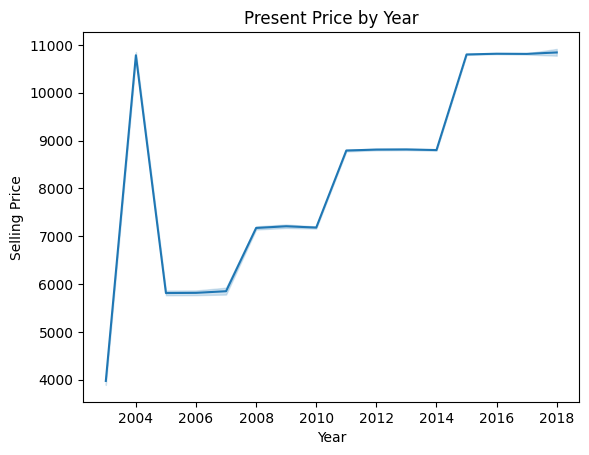

In [23]:
sns.lineplot(x='Year', y='Selling_Price', data = clean_df)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Present Price by Year')
plt.show()

Theres an upward trend in cars prices with respect to year

Manufacturer A process the most expensive car

### Price by car type

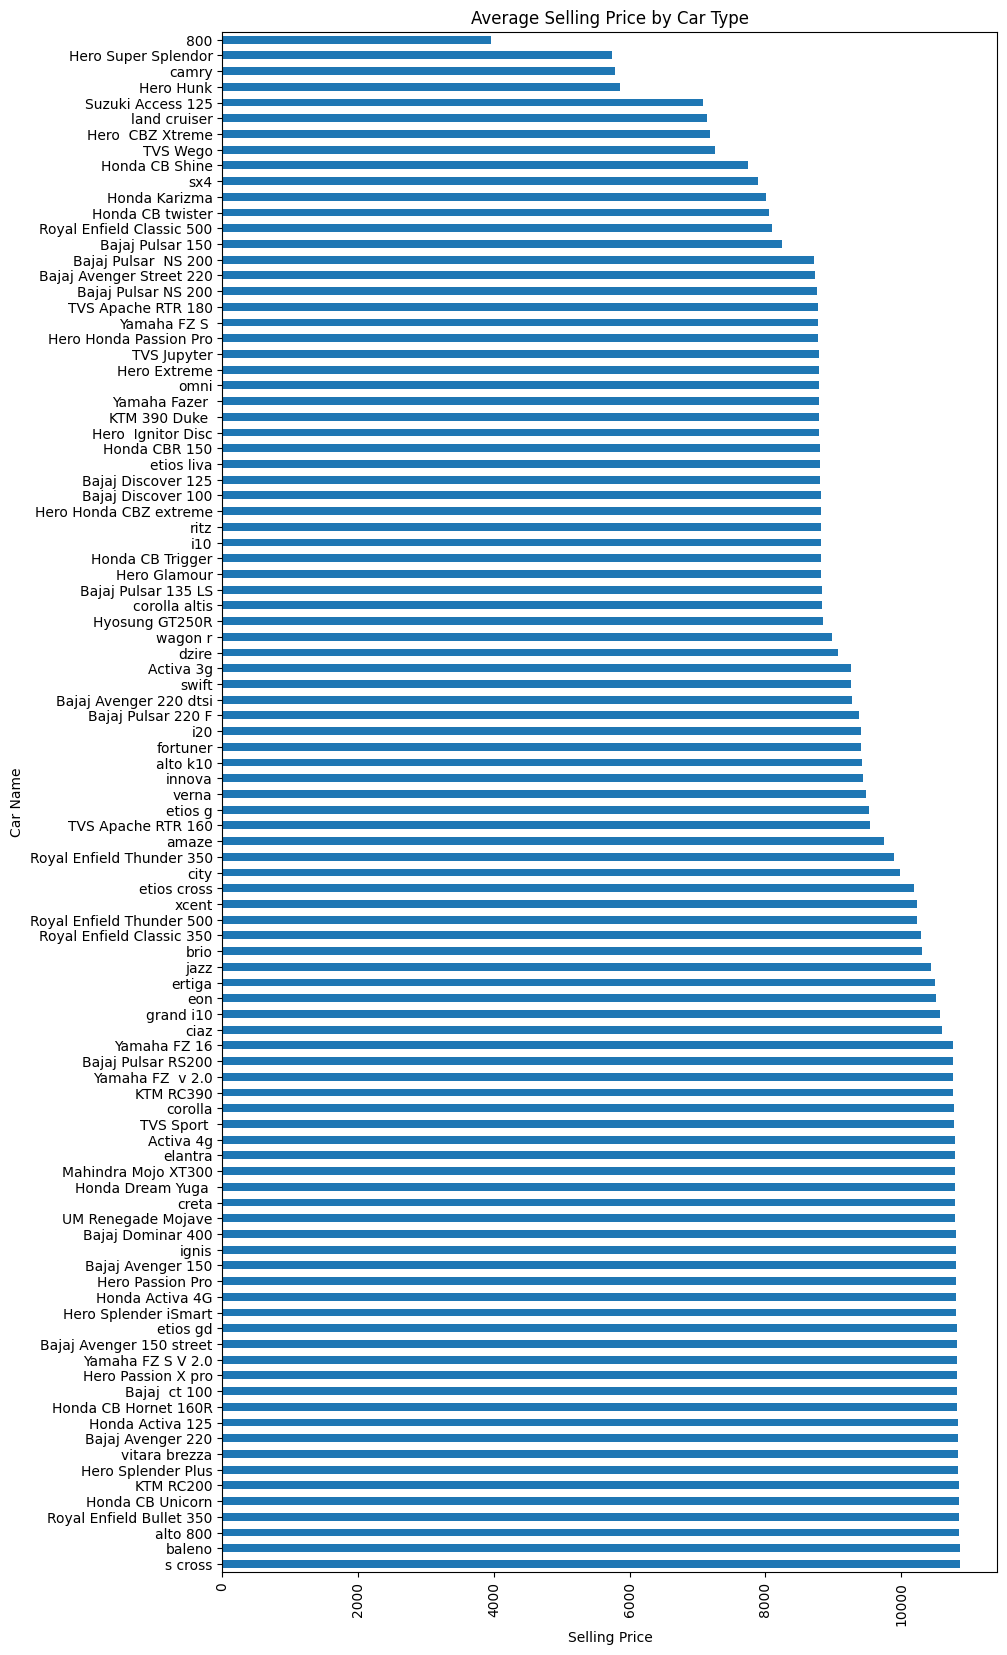

In [25]:
plt.figure(figsize=(10,20)) 

clean_df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False).plot(kind='barh') 
plt.xlabel('Selling Price') 
plt.ylabel('Car Name') 
plt.title('Average Selling Price by Car Type') 
plt.xticks(rotation=90) 
plt.show() 

Camry, Hero Super Splendor and 800 are 3 of the least expensive cars to purchase

### Distance Travlled vs price and Fuel type

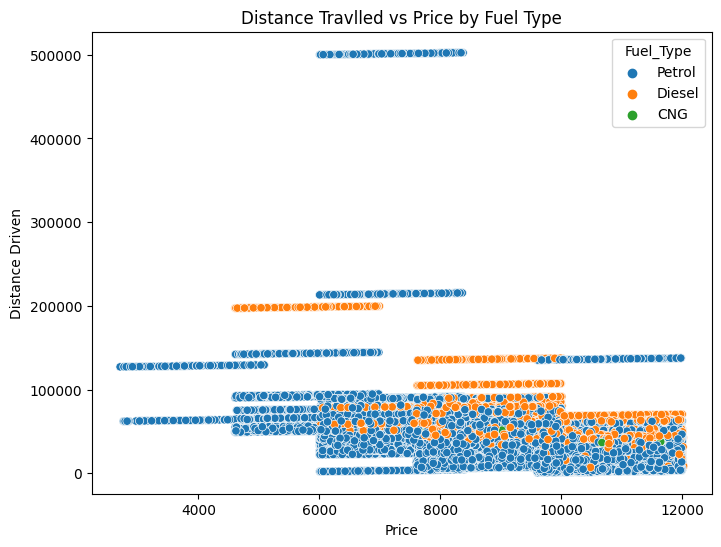

In [32]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='Selling_Price', y='Kms_Driven', hue='Fuel_Type', data=clean_df) 
plt.xlabel('Price') 
plt.ylabel('Distance Driven') 
plt.title('Distance Travlled vs Price by Fuel Type') 
plt.show() 

The distance travelled by a car has no relationship to its price

### Present Price by selling price

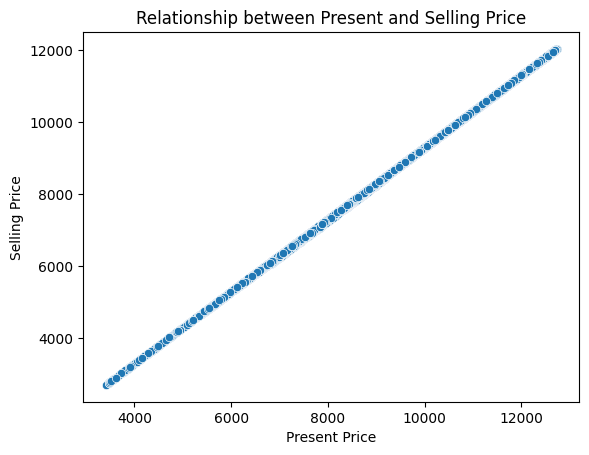

In [28]:
sns.scatterplot(x= 'Present_Price', y='Selling_Price', data = clean_df)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Relationship between Present and Selling Price')
plt.show()

The present car price and its selling price have a strong inverse linear relationship. This implies that an increase in one variable leads to a decrease in the other 

### Kilometer driven by transmission type

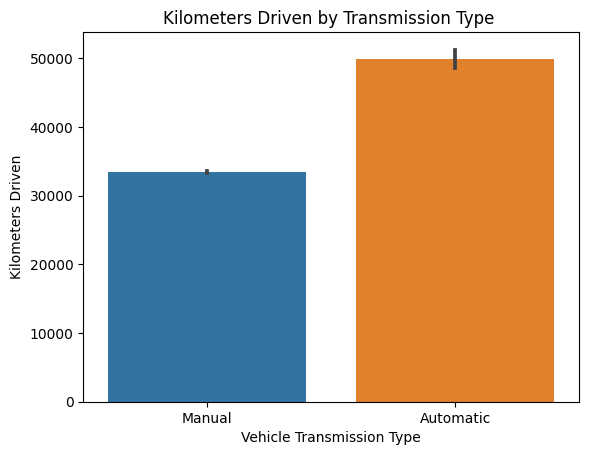

In [43]:
sns.barplot(x = 'Transmission', y = 'Kms_Driven', data = clean_df)
plt.xlabel('Vehicle Transmission Type')
plt.ylabel('Kilometers Driven')
plt.title('Kilometers Driven by Transmission Type ')
plt.show()

There are only 2 types of transmission. And Automatic vehicles have more records, hence more distance travelled

### Car type by transmission type

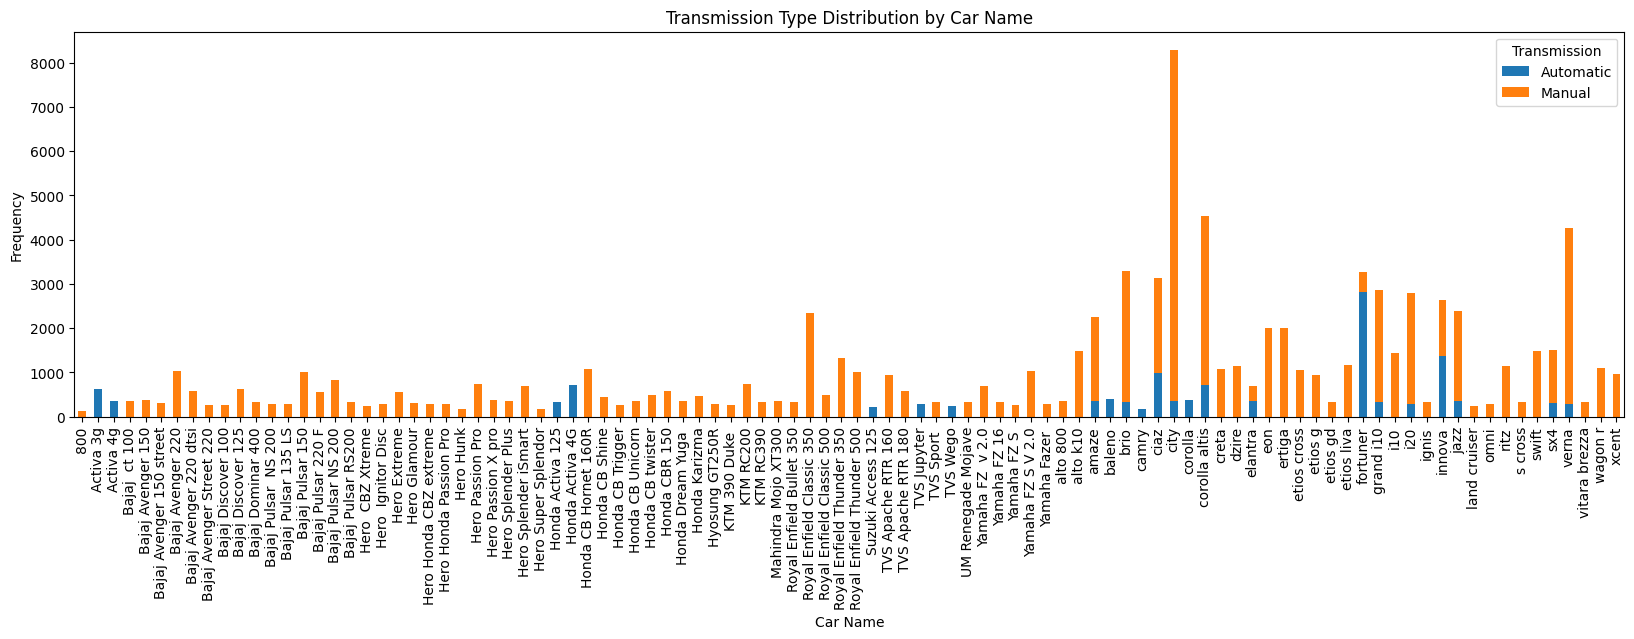

In [44]:
# Group the data by Car_name and Fuel_Type, and count the occurrences
grouped_data = clean_df.groupby(['Car_Name', 'Transmission']).size().reset_index(name='Count')

# Pivot the data to make it easier to plot
pivoted_data = grouped_data.pivot(index='Car_Name', columns='Transmission', values='Count')

# Plot the grouped bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(20, 5))

# Add labels and title
plt.xlabel('Car Name')
plt.ylabel('Frequency')
plt.title('Transmission Type Distribution by Car Name')

plt.show()

Most cars produces use Manual transmission

### Car type by fuel type use

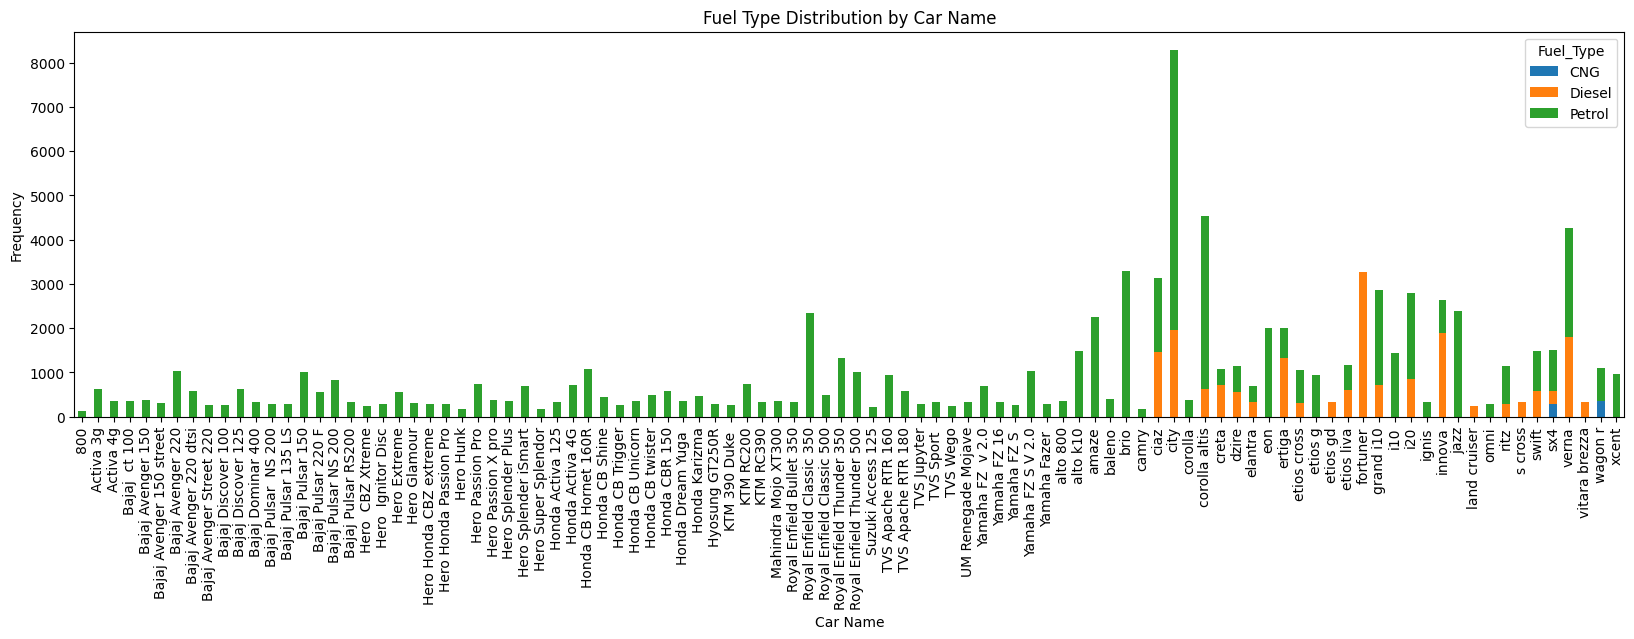

In [30]:
# Group the data by Car_name and Fuel_Type, and count the occurrences
grouped_data = clean_df.groupby(['Car_Name', 'Fuel_Type']).size().reset_index(name='Count')

# Pivot the data to make it easier to plot
pivoted_data = grouped_data.pivot(index='Car_Name', columns='Fuel_Type', values='Count')

# Plot the grouped bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(20, 5))

# Add labels and title
plt.xlabel('Car Name')
plt.ylabel('Frequency')
plt.title('Fuel Type Distribution by Car Name')

plt.show()

The most used fuel type is petrol with a wide margin. Only two types of cars use Compressed Natural Gas (CNG)

### Price by fuel type

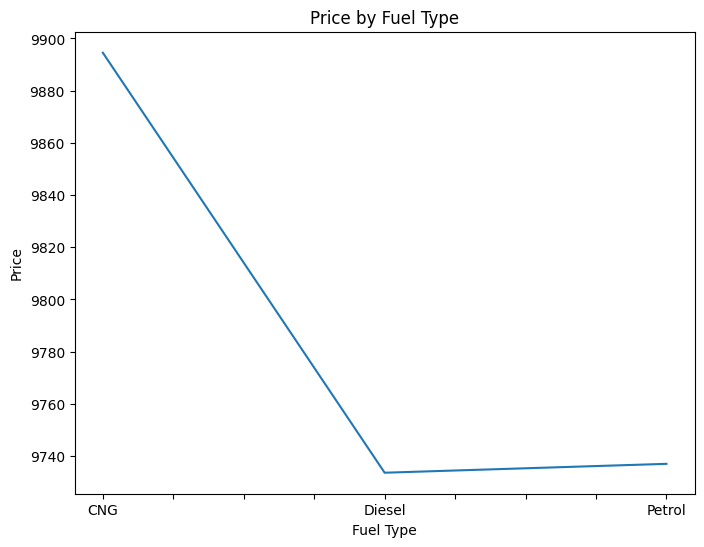

In [39]:
plt.figure(figsize=(8, 6)) 

clean_df.groupby('Fuel_Type')['Selling_Price'].mean().plot(kind='line')
plt.xlabel('Fuel Type') 
plt.ylabel('Price') 
plt.title('Price by Fuel Type') 

plt.show() 

Surprisingly, CNG is the most expensive fuel type, undermining its the list used. The cheapest is diesel

### Car type by Manufacturer

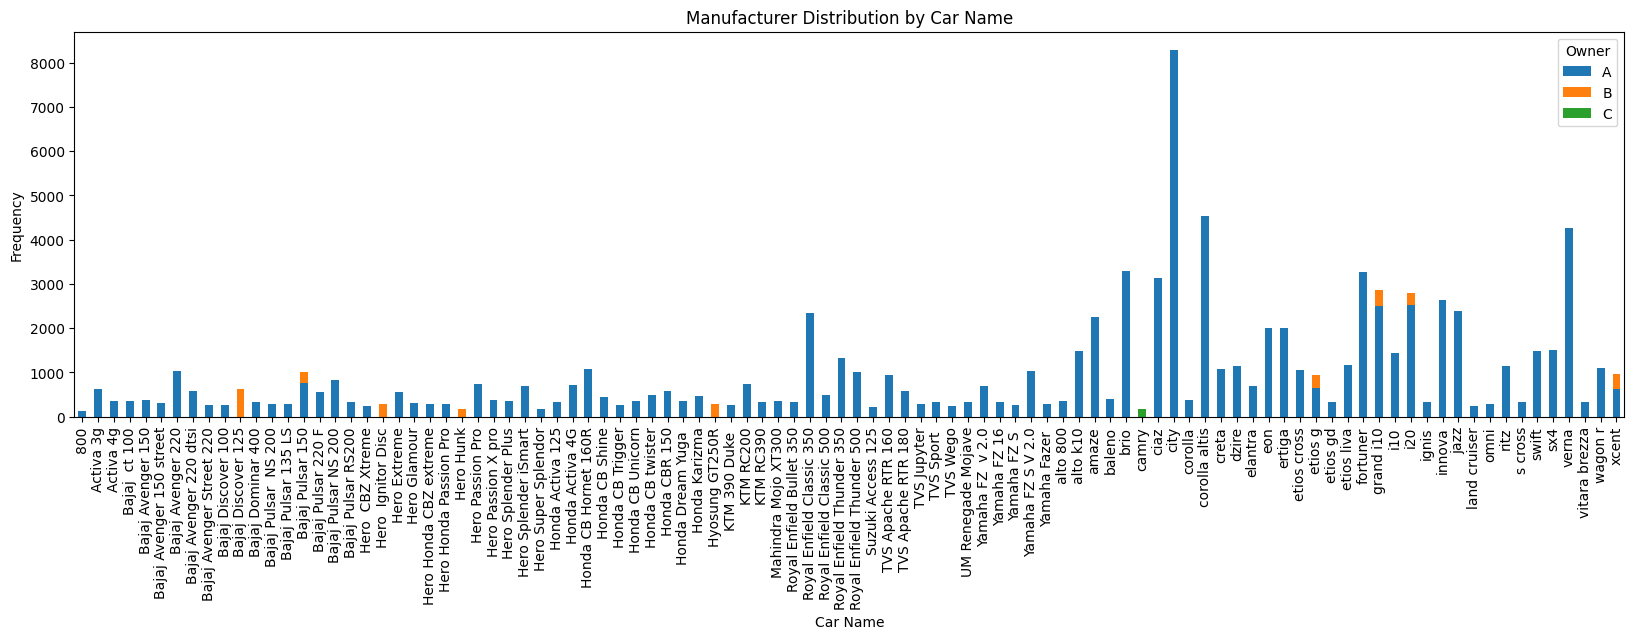

In [40]:
grouped_data = clean_df.groupby(['Car_Name', 'Owner']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Car_Name', columns='Owner', values='Count')
pivoted_data.plot(kind='bar', stacked=True, figsize=(20, 5))

# Add labels and title
plt.xlabel('Car Name')
plt.ylabel('Frequency')
plt.title('Manufacturer Distribution by Car Name')

plt.show()

Manufacturer A produces the most cars. - Almost looks like a monopoly market for A, while B produces only 9 cars and C produces only 1

### Price by Manufactuerer

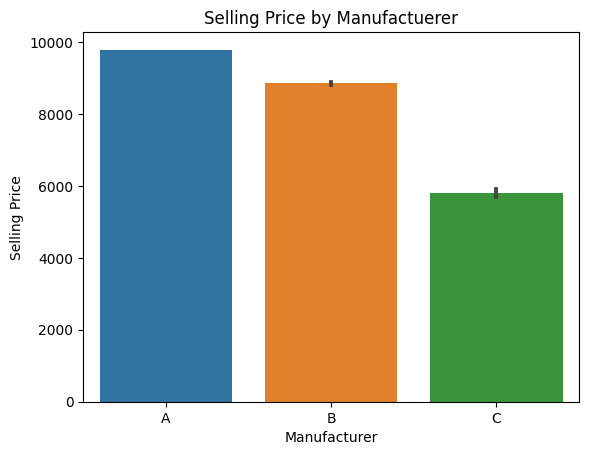

In [41]:
sns.barplot(x = 'Owner', y = 'Selling_Price', data = clean_df)
plt.xlabel('Manufacturer')
plt.ylabel('Selling Price')
plt.title('Selling Price by Manufactuerer')
plt.show()

Manufacturer does not just produce the most cars, his cars are also the most expensive